In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Specify what percent of the data you want to keep here:
PERCENT_TO_KEEP = 2

In [2]:
# Importing accidents dataset
accidents_df = pd.read_csv("./archive/US_Accidents_March23.csv")

In [63]:
# Creating random subsample
random_subsample_df = accidents_df.sample(70000)

In [64]:
random_subsample_df.shape

(70000, 46)

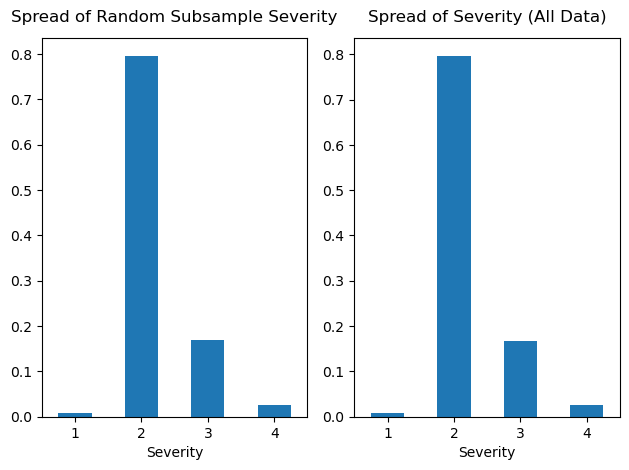

In [66]:
# Comparing spread to full dataset
state_subset_df.shape
ax = plt.subplot(1,2,1)
(random_subsample_df.groupby('Severity').count() / random_subsample_df.count()).ID.plot(kind='bar',rot=0,ax=ax)
plt.title("Spread of Random Subsample Severity",y=1.02)
ax = plt.subplot(1,2,2)
(accidents_df.groupby('Severity').count() / accidents_df.count()).ID.plot(kind='bar',rot=0,ax=ax)
plt.title("Spread of Severity (All Data)",y=1.02)
plt.tight_layout()
plt.show()
# Very representative of the total dataset, but likely to be missing important regions
# Sampling by region would be better...

In [30]:
# Sampling 2% of accidents in each zipcode
zipcode_subsample_df = accidents_df.groupby("Zipcode").sample(frac=PERCENT_TO_KEEP/100)

In [31]:
# Displaying size of filtered dataset
zipcode_subsample_df.shape

(117216, 46)

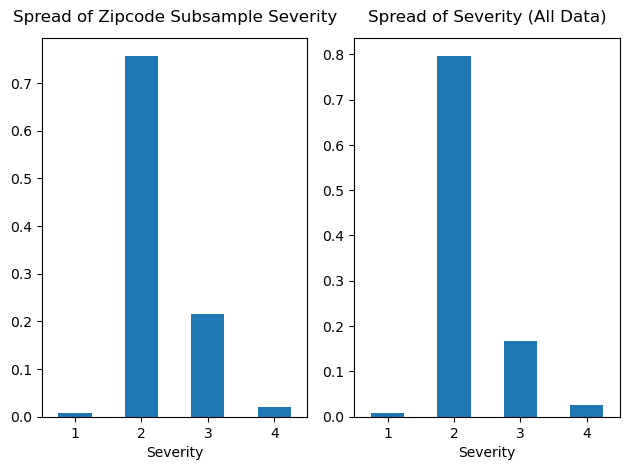

In [62]:
# Comparing spread to full dataset
state_subset_df.shape
ax = plt.subplot(1,2,1)
(zipcode_subsample_df.groupby('Severity').count() / zipcode_subsample_df.count()).ID.plot(kind='bar',rot=0,ax=ax)
plt.title("Spread of Zipcode Subsample Severity",y=1.02)
ax = plt.subplot(1,2,2)
(accidents_df.groupby('Severity').count() / accidents_df.count()).ID.plot(kind='bar',rot=0,ax=ax)
plt.title("Spread of Severity (All Data)",y=1.02)
plt.tight_layout()
plt.show()
# Severity 3 appears to be notably over-represented...
# Maybe groupby a larger region instead?

In [33]:
# Sampling by state
state_subsample_df = accidents_df.groupby("State").sample(frac=PERCENT_TO_KEEP/100)
# Displaying size of filtered dataset
state_subset_df.shape

(154568, 46)

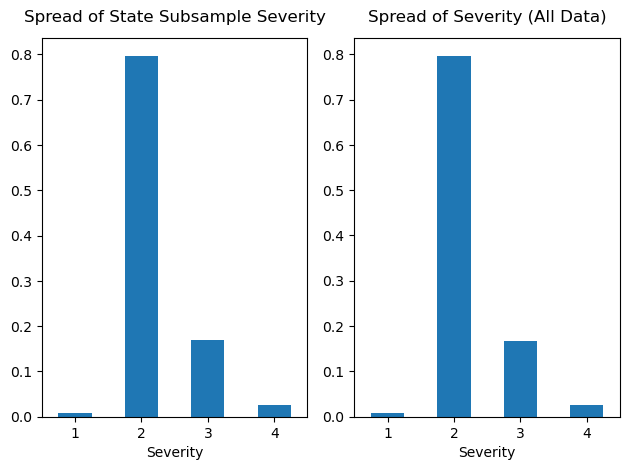

In [61]:
# Comparing spread to full dataset
ax = plt.subplot(1,2,1)
(state_subsample_df.groupby('Severity').count() / state_subsample_df.count()).ID.plot(kind='bar',rot=0,ax=ax)
plt.title("Spread of State Subsample Severity",y=1.02)
ax = plt.subplot(1,2,2)
(accidents_df.groupby('Severity').count() / accidents_df.count()).ID.plot(kind='bar',rot=0,ax=ax)
plt.title("Spread of Severity (All Data)",y=1.02)
plt.tight_layout()
plt.show()
# Much more representative of the full dataset, but still prone to skipping large areas.
# Try a slightly smaller region scale?

In [42]:
# Sampling by state
city_subsample_df = accidents_df.groupby("City").sample(frac=PERCENT_TO_KEEP/100)
# Displaying size of filtered dataset
city_subsample_df.shape

(153854, 46)

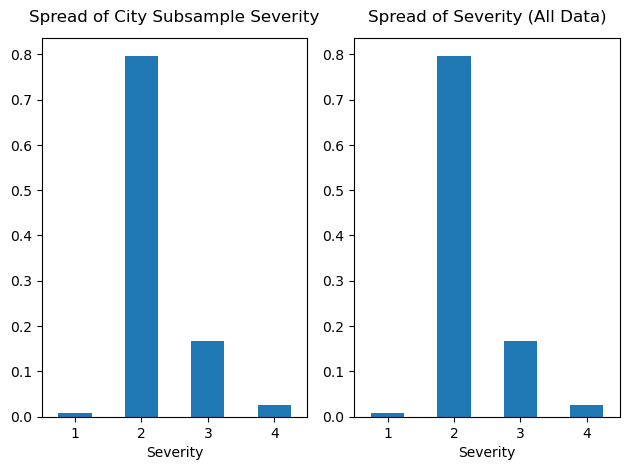

In [60]:
# Comparing spread to full dataset
ax = plt.subplot(1,2,1)
(city_subsample_df.groupby('Severity').count() / city_subsample_df.count()).ID.plot(kind='bar',rot=0,ax=ax)
plt.title("Spread of City Subsample Severity",y=1.02)
ax = plt.subplot(1,2,2)
(accidents_df.groupby('Severity').count() / accidents_df.count()).ID.plot(kind='bar',rot=0,ax=ax)
plt.title("Spread of Severity (All Data)",y=1.02)
plt.tight_layout()
plt.show()
# Representative of the larger dataset AND unlikely to leave out chunks of important data!
# Best choice for sampling thus far

In [67]:
# Displaying exact values for better comparison
# City subset values
(city_subsample_df.groupby('Severity').count() / city_subsample_df.count()).ID

Severity
1    0.008703
2    0.796541
3    0.168023
4    0.026733
Name: ID, dtype: float64

In [68]:
# Total dataset values
(accidents_df.groupby('Severity').count() / accidents_df.count()).ID

Severity
1    0.008717
2    0.796670
3    0.168125
4    0.026488
Name: ID, dtype: float64

In [44]:
# Saving current best subsample
city_subsample_df.to_csv("./datasets/city_subsample.csv")